In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns    

In [41]:
example = pd.read_excel('data/Substance_20220708_1314_100.xlsx', engine='openpyxl', sheet_name=4, header=7)

In [43]:
yes = example[example['Property']=='pKa']['Value and Units'].iloc[0].split('±')[0]
float(yes)

IndexError: single positional indexer is out-of-bounds

In [44]:
yes2 = example[example['Property']=='Density']['Value and Units'].iloc[0].split('±')[0].split()[0]
float(yes2)

1.079

In [45]:
yes3 = example[example['Property']=='Molar Volume']['Value and Units'].iloc[0].split('±')[0]
float(yes3)

183.8

In [46]:
yes4 = example[example['Property']=='Freely Rotatable Bonds']['Value and Units'].iloc[0]
int(yes4)

2

In [47]:
example[example['Property']=='H Acceptors']['Value and Units']

173    1
Name: Value and Units, dtype: object

In [48]:
example[example['Property']=='H Donors']['Value and Units']

174    0
Name: Value and Units, dtype: object

In [49]:
example[example['Property']=='Molecular Weight']['Value and Units']

168    196.24
177    196.24
Name: Value and Units, dtype: object

In [50]:
example[example['Property']=='Polar Surface Area']['Value and Units']

178    17.1 A2
Name: Value and Units, dtype: object

In [72]:
data = pd.DataFrame(columns=['Density', 'Molar Volume', 'Freely Rotatable Bonds', 'H Acceptors', 'H Donors', 'Molecular Weight', 'Polar Surface Area', 'Boiling Point'])
data

,Density,Molar Volume,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight,Polar Surface Area,Boiling Point


In [52]:
example = pd.read_excel('data/Substance_20220708_1314_100.xlsx', engine='openpyxl', sheet_name=2, header=7)

C:\Users\kev22\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [71]:
boilingPoint = cur[cur['Property']=='Boiling Point']['Value and Units'].iloc[0].split('±')[0].split()[0]
boilingPoint

'541.5'

In [75]:
k = 1314
for j in range(1, 101):
    try:
        readMulty = pd.read_excel('data/Substance_20220708_{}_{}.xlsx'.format(str(k), j*100), engine='openpyxl', sheet_name=[i for i in range(2, 102)], header=7)
    except:
        k += 1
        readMulty = pd.read_excel('data/Substance_20220708_{}_{}.xlsx'.format(str(k), j*100), engine='openpyxl', sheet_name=[i for i in range(2, 102)], header=7)
    for i in range(2, 102):
        dataDict = {}
        cur = readMulty[i]

        try:
            density = cur[cur['Property']=='Density']['Value and Units'].iloc[0].split('±')[0].split()[0]
            dataDict['Density'] = float(density)
        except:
            pass

        try:
            molarVolume = cur[cur['Property']=='Molar Volume']['Value and Units'].iloc[0].split('±')[0].split()[0]
            dataDict['Molar Volume'] = float(molarVolume)
        except:
            pass

        try:
            freelyRotatableBonds = cur[cur['Property']=='Freely Rotatable Bonds']['Value and Units'].iloc[0].split('±')[0].split()[0]
            dataDict['Freely Rotatable Bonds'] = float(freelyRotatableBonds)
        except:
            pass

        try:
            hAcceptors = cur[cur['Property']=='H Acceptors']['Value and Units'].iloc[0].split('±')[0].split()[0]
            dataDict['H Acceptors'] = int(hAcceptors)
        except:
            pass

        try:
            hDonors = cur[cur['Property']=='H Donors']['Value and Units'].iloc[0].split('±')[0].split()[0]
            dataDict['H Donors'] = int(hDonors)
        except:
            pass

        try:
            molecularWeight = cur[cur['Property']=='Molecular Weight']['Value and Units'].iloc[0].split('±')[0].split()[0]
            dataDict['Molecular Weight'] = float(molecularWeight)
        except:
            pass

        try:
            polarSurfaceArea = cur[cur['Property']=='Polar Surface Area']['Value and Units'].iloc[0].split('±')[0].split()[0]
            dataDict['Polar Surface Area'] = float(polarSurfaceArea)
        except:
            pass

        try:
            boilingPoint = cur[cur['Property']=='Boiling Point']['Value and Units'].iloc[0].split('±')[0].split()[0]
            dataDict['Boiling Point'] = float(boilingPoint)
        except:
            pass

        data = data.append(dataDict, ignore_index=True)

C:\Users\kev22\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [55]:
example

,Type,Category,Property,Value and Units,Temperature,Pressure,pH,Most Acidic / Most Basic,Solvent,Wavelength,Pathlength,Concentration,Organism,Route,Attribution,Source
0,Experimental,Thermal,Melting Point,201-203 °C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAS,1 Source
1,Predicted,Biological,Bioconcentration Factor,32.7,25 °C,NaN,pH 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACD,Calculated using Advanced Chemistry Developmen...
2,Predicted,Biological,Bioconcentration Factor,37.9,25 °C,NaN,pH 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACD,Calculated using Advanced Chemistry Developmen...
3,Predicted,Biological,Bioconcentration Factor,38.5,25 °C,NaN,pH 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACD,Calculated using Advanced Chemistry Developmen...
4,Predicted,Biological,Bioconcentration Factor,38.6,25 °C,NaN,pH 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACD,Calculated using Advanced Chemistry Developmen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Predicted,Lipinski,Molecular Weight,306.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Predicted,Structure Related,Polar Surface Area,118 A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACD,Calculated using Advanced Chemistry Developmen...
68,Predicted,Thermal,Boiling Point,444.8±55.0 °C,NaN,760 Torr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACD,Calculated using Advanced Chemistry Developmen...
69,Predicted,Thermal,Enthalpy of Vaporization,70.27±3.0 kJ/mol,NaN,760 Torr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACD,Calculated using Advanced Chemistry Developmen...


In [76]:
data.head()

,Density,Molar Volume,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight,Polar Surface Area,Boiling Point
0,1.799,167.9,6.0,7.0,5.0,302.24,127.0,642.4
1,0.990,107.9,1.0,1.0,2.0,107.15,26.0,NaN
2,1.079,183.8,2.0,1.0,0.0,196.24,17.1,218.6
3,1.265,109.2,1.0,2.0,2.0,138.19,71.0,278.9
4,1.328,156.6,0.0,2.0,0.0,208.21,34.1,406.0


In [77]:
data.isnull().sum()

Density                    460
Molar Volume               466
Freely Rotatable Bonds     333
H Acceptors                333
H Donors                   333
Molecular Weight           256
Polar Surface Area         333
Boiling Point             1300
dtype: int64

In [86]:
dataDropped = data.dropna(axis = 0)

In [87]:
dataDropped

,Density,Molar Volume,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight,Polar Surface Area,Boiling Point
0,1.799,167.9,6.0,7.0,5.0,302.24,127.0,642.4
2,1.079,183.8,2.0,1.0,0.0,196.24,17.1,218.6
3,1.265,109.2,1.0,2.0,2.0,138.19,71.0,278.9
4,1.328,156.6,0.0,2.0,0.0,208.21,34.1,406.0
5,1.331,143.1,1.0,2.0,0.0,190.65,42.5,330.2
...,...,...,...,...,...,...,...,...
9994,1.630,128.1,3.0,7.0,1.0,209.16,93.1,488.8
9996,1.892,113.2,1.0,0.0,0.0,214.43,0.0,175.8
9997,1.475,104.7,0.0,3.0,0.0,154.55,38.9,322.4
9998,1.403,517.7,17.0,11.0,4.0,726.73,161.0,942.0


In [88]:
%matplotlib inline

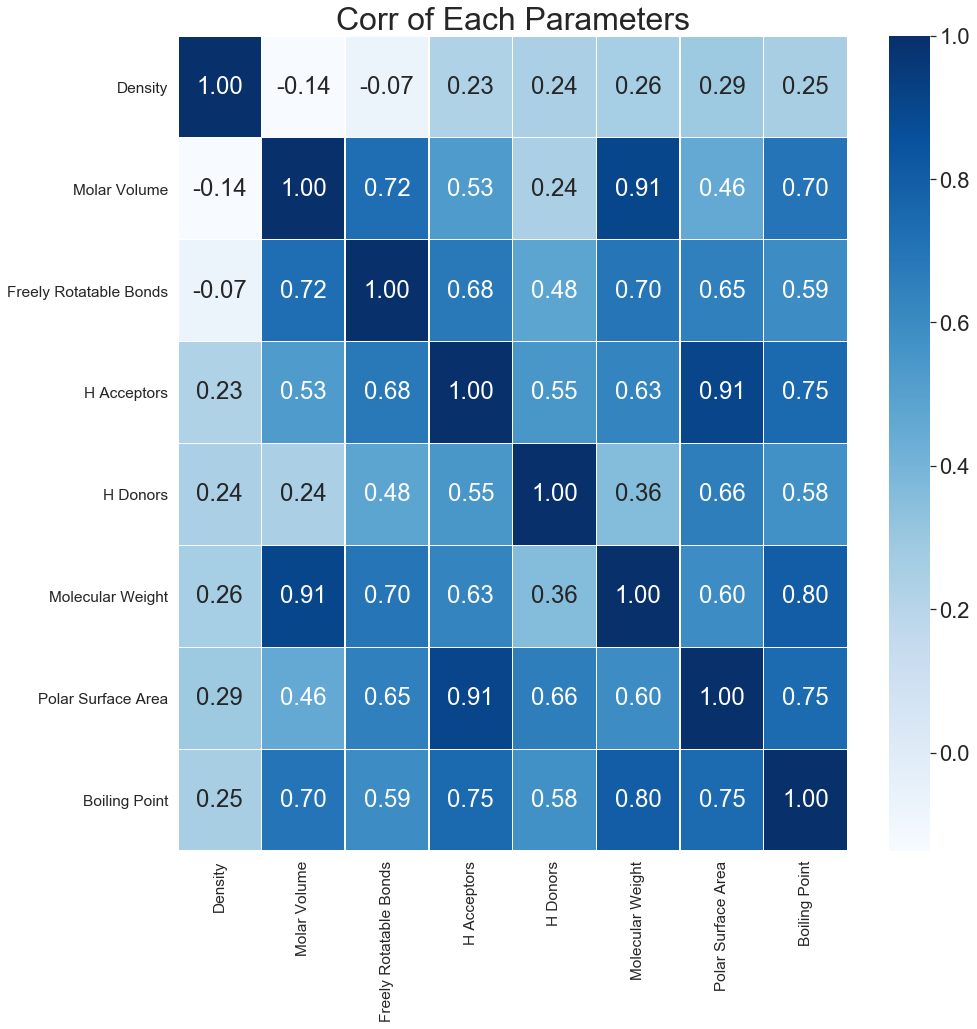

In [187]:
plt.figure(figsize=(15,15))
plt.title('Corr of Each Parameters', fontdict={'fontsize': 32})
sns.set(font_scale=2)
sns.heatmap(data = dataDropped.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [92]:
dataDropped.describe()

,Density,Molar Volume,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight,Polar Surface Area,Boiling Point
count,8589.000000,8589.000000,8589.000000,8589.000000,8589.000000,8589.000000,8589.000000,8589.000000
mean,1.340224,228.594877,4.293515,4.630807,1.056933,303.741771,69.761773,451.896253
std,0.246434,93.793386,3.521725,2.984362,1.550244,128.187316,45.173897,163.269917
min,0.758000,49.500000,0.000000,0.000000,0.000000,68.120000,0.000000,-5.400000
25%,1.180000,167.300000,2.000000,3.000000,0.000000,218.290000,40.900000,344.500000
50%,1.306000,210.200000,4.000000,4.000000,1.000000,279.330000,62.700000,436.500000
75%,1.450000,266.100000,6.000000,6.000000,2.000000,356.180000,87.700000,538.200000
max,3.307000,1169.000000,37.000000,32.000000,15.000000,1832.620000,459.000000,1489.800000


In [109]:
import math

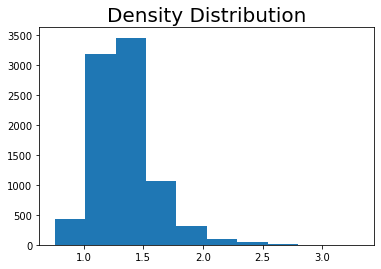

In [101]:
plt.hist(dataDropped['Density'])
plt.title('Density Distribution', fontdict={'fontsize': 20})
plt.show()

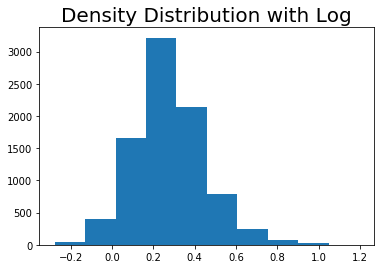

In [110]:
plt.hist(dataDropped['Density'].apply(lambda x : math.log(x)))
plt.title('Density Distribution with Log', fontdict={'fontsize': 20})
plt.show()

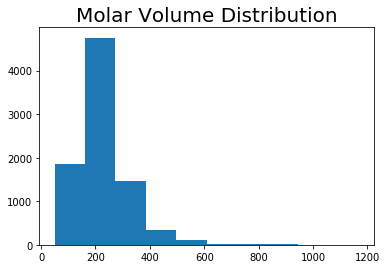

In [112]:
plt.hist(dataDropped['Molar Volume'])
plt.title('Molar Volume Distribution', fontdict={'fontsize': 20})
plt.show()

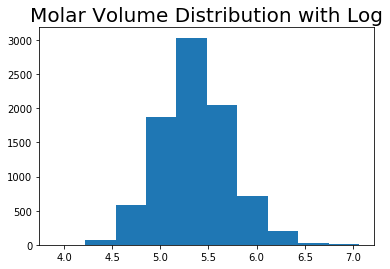

In [111]:
plt.hist(dataDropped['Molar Volume'].apply(lambda x : math.log(x)))
plt.title('Molar Volume Distribution with Log', fontdict={'fontsize': 20})
plt.show()

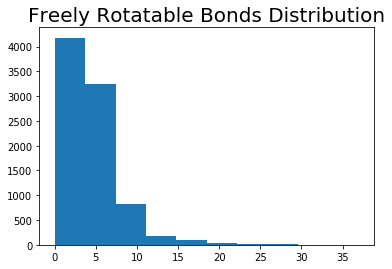

In [113]:
plt.hist(dataDropped['Freely Rotatable Bonds'])
plt.title('Freely Rotatable Bonds Distribution', fontdict={'fontsize': 20})
plt.show()

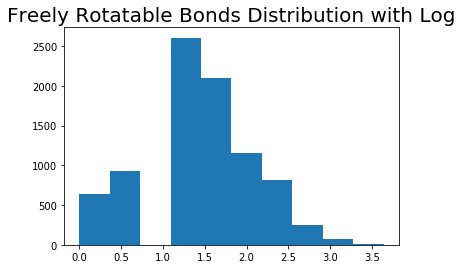

In [119]:
plt.hist(dataDropped['Freely Rotatable Bonds'].apply(lambda x : math.log(x+1)))
plt.title('Freely Rotatable Bonds Distribution with Log', fontdict={'fontsize': 20})
plt.show()

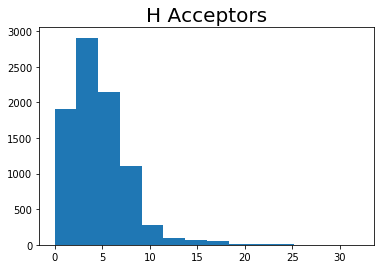

In [123]:
plt.hist(dataDropped['H Acceptors'], bins = 14)
plt.title('H Acceptors', fontdict={'fontsize': 20})
plt.show()

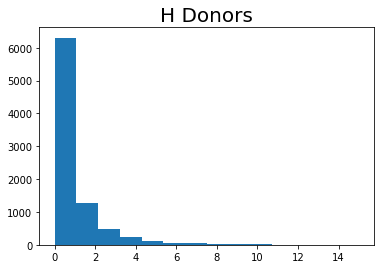

In [122]:
plt.hist(dataDropped['H Donors'], bins = 14)
plt.title('H Donors', fontdict={'fontsize': 20})
plt.show()

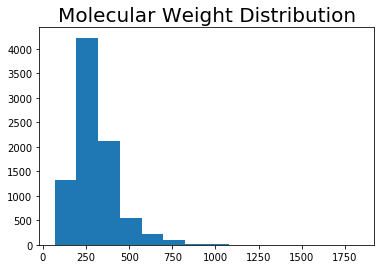

In [124]:
plt.hist(dataDropped['Molecular Weight'], bins = 14)
plt.title('Molecular Weight Distribution', fontdict={'fontsize': 20})
plt.show()

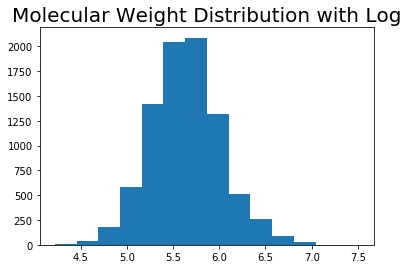

In [126]:
plt.hist(dataDropped['Molecular Weight'].apply(lambda x: math.log(x)), bins = 14)
plt.title('Molecular Weight Distribution with Log', fontdict={'fontsize': 20})
plt.show()

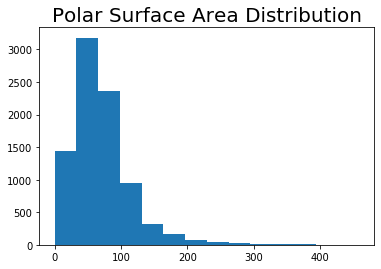

In [127]:
plt.hist(dataDropped['Polar Surface Area'], bins = 14)
plt.title('Polar Surface Area Distribution', fontdict={'fontsize': 20})
plt.show()

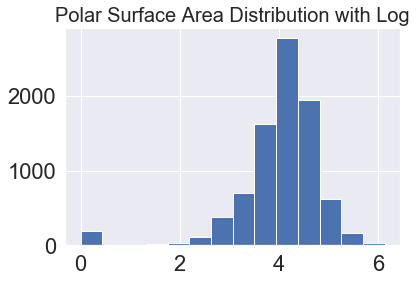

In [189]:
plt.hist(dataDropped['Polar Surface Area'].apply(lambda x: math.log(x+1)), bins = 14)
plt.title('Polar Surface Area Distribution with Log', fontdict={'fontsize': 20})
plt.show()

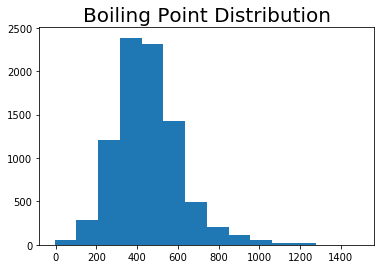

In [130]:
plt.hist(dataDropped['Boiling Point'], bins = 14)
plt.title('Boiling Point Distribution', fontdict={'fontsize': 20})
plt.show()

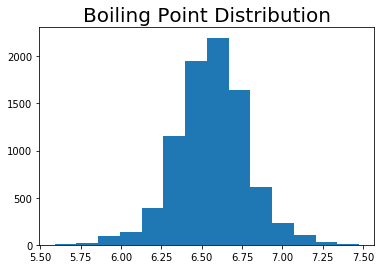

In [131]:
plt.hist(dataDropped['Boiling Point'].apply(lambda x: math.log(x+273)), bins = 14)
plt.title('Boiling Point Distribution', fontdict={'fontsize': 20})
plt.show()

In [132]:
!pip install lightgbm

In [174]:
X = dataDropped.drop(['Boiling Point'], axis =1)
y = dataDropped['Boiling Point']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
print(mae(y_test, y_pred))
print(mse(y_test, y_pred)**0.5)

[1]	training's l2: 22369.8	valid_0's l2: 24067.6
[2]	training's l2: 19174.7	valid_0's l2: 20801.5
[3]	training's l2: 16551.9	valid_0's l2: 18074.4
[4]	training's l2: 14395.9	valid_0's l2: 15770.3
[5]	training's l2: 12603.8	valid_0's l2: 13877.4
[6]	training's l2: 11138.7	valid_0's l2: 12315.7
[7]	training's l2: 9931.71	valid_0's l2: 11043.2
[8]	training's l2: 8917.63	valid_0's l2: 9990.57
[9]	training's l2: 8074.45	valid_0's l2: 9144.95
[10]	training's l2: 7378.77	valid_0's l2: 8418.04
[11]	training's l2: 6784.42	valid_0's l2: 7814.54
[12]	training's l2: 6290.87	valid_0's l2: 7291.38
[13]	training's l2: 5880.92	valid_0's l2: 6881.65
[14]	training's l2: 5535.8	valid_0's l2: 6520.64
[15]	training's l2: 5239.39	valid_0's l2: 6191.24
[16]	training's l2: 4990.49	valid_0's l2: 5938.79
[17]	training's l2: 4775.31	valid_0's l2: 5741.42
[18]	training's l2: 4591.2	valid_0's l2: 5549.23
[19]	training's l2: 4431.36	valid_0's l2: 5367.64
[20]	training's l2: 4294.52	valid_0's l2: 5220.25
[21]	traini

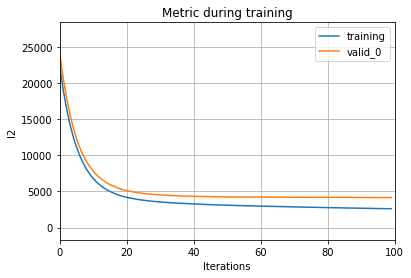

In [175]:
lgb.plot_metric(model)

In [141]:
dataConv = pd.DataFrame(columns = ['Density Conv.', 'Molar Volume Conv.', 'Freely Rotatable Bonds', 'H Acceptors', 'H Donors', 'Molecular Weight Conv.', 'Polar Surface Area Conv.', 'Boiling Point Conv.'])

In [142]:
dataConv

,Density Conv.,Molar Volume Conv.,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight Conv.,Polar Surface Area Conv.,Boiling Point Conv.


In [144]:
dataConv['Density Conv.'] = np.log1p(dataDropped['Density'])
dataConv['Molar Volume Conv.'] = np.log1p(dataDropped['Molar Volume'])
dataConv['Freely Rotatable Bonds'] = dataDropped['Freely Rotatable Bonds']
dataConv['H Acceptors'] = dataDropped['H Acceptors']
dataConv['H Donors'] = dataDropped['H Donors']
dataConv['Molecular Weight Conv.'] = np.log1p(dataDropped['Molecular Weight'])
dataConv['Polar Surface Area Conv.'] = np.log1p(dataDropped['Polar Surface Area'])
dataConv['Boiling Point Conv.'] = np.log1p(dataDropped['Boiling Point']+272)

In [145]:
dataConv

,Density Conv.,Molar Volume Conv.,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight Conv.,Polar Surface Area Conv.,Boiling Point Conv.
0,1.029262,5.129307,6.0,7.0,5.0,5.714525,4.852030,6.819361
2,0.731887,5.219274,2.0,1.0,0.0,5.284421,2.895912,6.197665
3,0.817575,4.702297,1.0,2.0,2.0,4.935840,4.276666,6.313367
4,0.845010,5.060060,0.0,2.0,0.0,5.343339,3.558201,6.520621
5,0.846297,4.970508,1.0,2.0,0.0,5.255671,3.772761,6.402249
...,...,...,...,...,...,...,...,...
9994,0.966984,4.860587,3.0,7.0,1.0,5.347869,4.544358,6.635684
9996,1.061948,4.737951,1.0,0.0,0.0,5.372636,0.000000,6.106577
9997,0.906240,4.660605,0.0,3.0,0.0,5.046967,3.686376,6.389233
9998,0.876718,6.251326,17.0,11.0,4.0,6.589930,5.087596,7.102499


In [146]:
dataConv.describe()

,Density Conv.,Molar Volume Conv.,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight Conv.,Polar Surface Area Conv.,Boiling Point Conv.
count,8589.000000,8589.000000,8589.000000,8589.000000,8589.000000,8589.000000,8589.000000,8589.000000
mean,0.845055,5.366545,4.293515,4.630807,1.056933,5.644341,4.018789,6.561594
std,0.100480,0.366055,3.521725,2.984362,1.550244,0.381646,0.851330,0.221208
min,0.564177,3.921973,0.000000,0.000000,0.000000,4.235844,0.000000,5.589493
25%,0.779325,5.125748,2.000000,3.000000,0.000000,5.390395,3.735286,6.425679
50%,0.835514,5.352806,4.000000,4.000000,1.000000,5.635967,4.154185,6.564560
75%,0.896088,5.587623,6.000000,6.000000,2.000000,5.878240,4.485260,6.698515
max,1.460242,7.064759,37.000000,32.000000,15.000000,7.514047,6.131226,7.474659


In [176]:
X = dataConv.drop(['Boiling Point Conv.'], axis =1)
y = dataConv['Boiling Point Conv.']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
model2 = lgb.LGBMRegressor()
model2.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
y_pred = model2.predict(X_test)
y_test_exp = np.expm1(y_test)-272
y_pred_exp = np.expm1(y_pred)-272
print(mae(y_test_exp, y_pred_exp))
print(mse(y_test_exp, y_pred_exp)**0.5)

[1]	training's l2: 0.0414924	valid_0's l2: 0.0437949
[2]	training's l2: 0.0358358	valid_0's l2: 0.0379882
[3]	training's l2: 0.0312112	valid_0's l2: 0.0333081
[4]	training's l2: 0.0274145	valid_0's l2: 0.0294454
[5]	training's l2: 0.0242193	valid_0's l2: 0.0261833
[6]	training's l2: 0.0215909	valid_0's l2: 0.0235496
[7]	training's l2: 0.0194157	valid_0's l2: 0.021357
[8]	training's l2: 0.017632	valid_0's l2: 0.0195865
[9]	training's l2: 0.0161341	valid_0's l2: 0.0180759
[10]	training's l2: 0.0148924	valid_0's l2: 0.0167793
[11]	training's l2: 0.0138385	valid_0's l2: 0.0157326
[12]	training's l2: 0.012946	valid_0's l2: 0.0148336
[13]	training's l2: 0.0121893	valid_0's l2: 0.0140713
[14]	training's l2: 0.0115601	valid_0's l2: 0.0134758
[15]	training's l2: 0.0110325	valid_0's l2: 0.0129771
[16]	training's l2: 0.0105679	valid_0's l2: 0.012473
[17]	training's l2: 0.010179	valid_0's l2: 0.0121052
[18]	training's l2: 0.00983316	valid_0's l2: 0.0117671
[19]	training's l2: 0.00953393	valid_0's 

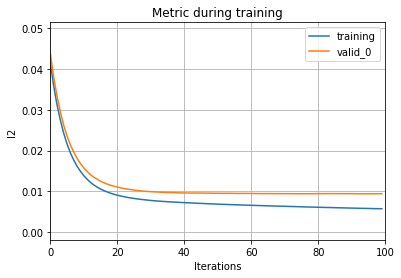

In [177]:
lgb.plot_metric(model2)

In [153]:
y_pred

array([6.55862362, 6.7268709 , 6.64420211, ..., 6.51025584, 6.64830469,
       6.31595312])

In [151]:
y_test_exp

1593    502.0
401     587.0
276     707.0
8131    326.7
4281    344.1
        ...  
9655    514.8
948     329.9
1754    392.5
7887    460.1
6467    290.7
Name: Boiling Point Conv., Length: 1718, dtype: float64

In [178]:
X = dataConv.drop(['Boiling Point Conv.', 'Density Conv.'], axis =1)
y = dataConv['Boiling Point Conv.']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
model3 = lgb.LGBMRegressor()
model3.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
y_pred = model3.predict(X_test)
y_test_exp = np.expm1(y_test)-272
y_pred_exp = np.expm1(y_pred)-272
print(mae(y_test_exp, y_pred_exp))
print(mse(y_test_exp, y_pred_exp)**0.5)

[1]	training's l2: 0.0414974	valid_0's l2: 0.0438001
[2]	training's l2: 0.0358534	valid_0's l2: 0.0380111
[3]	training's l2: 0.0312363	valid_0's l2: 0.0333503
[4]	training's l2: 0.0274353	valid_0's l2: 0.0294776
[5]	training's l2: 0.0242844	valid_0's l2: 0.0262762
[6]	training's l2: 0.0217035	valid_0's l2: 0.0236745
[7]	training's l2: 0.0195474	valid_0's l2: 0.0214386
[8]	training's l2: 0.0177467	valid_0's l2: 0.0196259
[9]	training's l2: 0.0162716	valid_0's l2: 0.0181482
[10]	training's l2: 0.0150505	valid_0's l2: 0.0169089
[11]	training's l2: 0.0140199	valid_0's l2: 0.01588
[12]	training's l2: 0.0131477	valid_0's l2: 0.0150038
[13]	training's l2: 0.012423	valid_0's l2: 0.0142655
[14]	training's l2: 0.0117669	valid_0's l2: 0.0135973
[15]	training's l2: 0.0112458	valid_0's l2: 0.0130927
[16]	training's l2: 0.0108031	valid_0's l2: 0.0126776
[17]	training's l2: 0.0104161	valid_0's l2: 0.0122801
[18]	training's l2: 0.0100818	valid_0's l2: 0.0119534
[19]	training's l2: 0.0097914	valid_0's 

In [171]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])

[1]	training's l2: 0.0414974	valid_0's l2: 0.0438001
[2]	training's l2: 0.0358534	valid_0's l2: 0.0380111
[3]	training's l2: 0.0312363	valid_0's l2: 0.0333503
[4]	training's l2: 0.0274353	valid_0's l2: 0.0294776
[5]	training's l2: 0.0242844	valid_0's l2: 0.0262762
[6]	training's l2: 0.0217035	valid_0's l2: 0.0236745
[7]	training's l2: 0.0195474	valid_0's l2: 0.0214386
[8]	training's l2: 0.0177467	valid_0's l2: 0.0196259
[9]	training's l2: 0.0162716	valid_0's l2: 0.0181482
[10]	training's l2: 0.0150505	valid_0's l2: 0.0169089
[11]	training's l2: 0.0140199	valid_0's l2: 0.01588
[12]	training's l2: 0.0131477	valid_0's l2: 0.0150038
[13]	training's l2: 0.012423	valid_0's l2: 0.0142655
[14]	training's l2: 0.0117669	valid_0's l2: 0.0135973
[15]	training's l2: 0.0112458	valid_0's l2: 0.0130927
[16]	training's l2: 0.0108031	valid_0's l2: 0.0126776
[17]	training's l2: 0.0104161	valid_0's l2: 0.0122801
[18]	training's l2: 0.0100818	valid_0's l2: 0.0119534
[19]	training's l2: 0.0097914	valid_0's 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

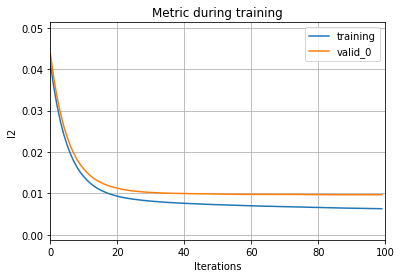

In [179]:
lgb.plot_metric(model3)

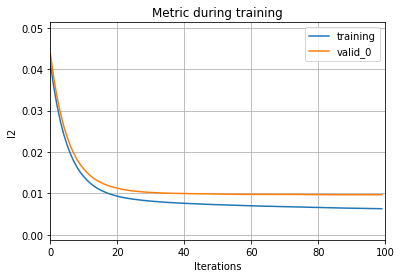

In [172]:
lgb.plot_metric(model)

In [180]:
dataConv

,Density Conv.,Molar Volume Conv.,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight Conv.,Polar Surface Area Conv.,Boiling Point Conv.
0,1.029262,5.129307,6.0,7.0,5.0,5.714525,4.852030,6.819361
2,0.731887,5.219274,2.0,1.0,0.0,5.284421,2.895912,6.197665
3,0.817575,4.702297,1.0,2.0,2.0,4.935840,4.276666,6.313367
4,0.845010,5.060060,0.0,2.0,0.0,5.343339,3.558201,6.520621
5,0.846297,4.970508,1.0,2.0,0.0,5.255671,3.772761,6.402249
...,...,...,...,...,...,...,...,...
9994,0.966984,4.860587,3.0,7.0,1.0,5.347869,4.544358,6.635684
9996,1.061948,4.737951,1.0,0.0,0.0,5.372636,0.000000,6.106577
9997,0.906240,4.660605,0.0,3.0,0.0,5.046967,3.686376,6.389233
9998,0.876718,6.251326,17.0,11.0,4.0,6.589930,5.087596,7.102499


In [181]:
dataConv2 = dataConv

In [182]:
dataConv2['Freely Rotatable Bonds'] = np.log1p(dataConv2['Freely Rotatable Bonds'])
dataConv2['H Acceptors'] = np.log1p(dataConv2['H Acceptors'])
dataConv2['H Donors'] = np.log1p(dataConv2['H Donors'])

In [183]:
dataConv2

,Density Conv.,Molar Volume Conv.,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight Conv.,Polar Surface Area Conv.,Boiling Point Conv.
0,1.029262,5.129307,1.945910,2.079442,1.791759,5.714525,4.852030,6.819361
2,0.731887,5.219274,1.098612,0.693147,0.000000,5.284421,2.895912,6.197665
3,0.817575,4.702297,0.693147,1.098612,1.098612,4.935840,4.276666,6.313367
4,0.845010,5.060060,0.000000,1.098612,0.000000,5.343339,3.558201,6.520621
5,0.846297,4.970508,0.693147,1.098612,0.000000,5.255671,3.772761,6.402249
...,...,...,...,...,...,...,...,...
9994,0.966984,4.860587,1.386294,2.079442,0.693147,5.347869,4.544358,6.635684
9996,1.061948,4.737951,0.693147,0.000000,0.000000,5.372636,0.000000,6.106577
9997,0.906240,4.660605,0.000000,1.386294,0.000000,5.046967,3.686376,6.389233
9998,0.876718,6.251326,2.890372,2.484907,1.609438,6.589930,5.087596,7.102499


In [184]:
X = dataConv2.drop(['Boiling Point Conv.', 'Density Conv.'], axis =1)
y = dataConv2['Boiling Point Conv.']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
model4 = lgb.LGBMRegressor()
model4.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
y_pred = model4.predict(X_test)
y_test_exp = np.expm1(y_test)-272
y_pred_exp = np.expm1(y_pred)-272
print(mae(y_test_exp, y_pred_exp))
print(mse(y_test_exp, y_pred_exp)**0.5)

[1]	training's l2: 0.0414974	valid_0's l2: 0.0438001
[2]	training's l2: 0.0358534	valid_0's l2: 0.0380111
[3]	training's l2: 0.0312363	valid_0's l2: 0.0333503
[4]	training's l2: 0.0274353	valid_0's l2: 0.0294776
[5]	training's l2: 0.0242844	valid_0's l2: 0.0262762
[6]	training's l2: 0.0217035	valid_0's l2: 0.0236745
[7]	training's l2: 0.0195474	valid_0's l2: 0.0214386
[8]	training's l2: 0.0177467	valid_0's l2: 0.0196259
[9]	training's l2: 0.0162716	valid_0's l2: 0.0181482
[10]	training's l2: 0.0150505	valid_0's l2: 0.0169089
[11]	training's l2: 0.0140199	valid_0's l2: 0.01588
[12]	training's l2: 0.0131477	valid_0's l2: 0.0150038
[13]	training's l2: 0.012423	valid_0's l2: 0.0142655
[14]	training's l2: 0.0117669	valid_0's l2: 0.0135973
[15]	training's l2: 0.0112458	valid_0's l2: 0.0130927
[16]	training's l2: 0.0108031	valid_0's l2: 0.0126776
[17]	training's l2: 0.0104161	valid_0's l2: 0.0122801
[18]	training's l2: 0.0100818	valid_0's l2: 0.0119534
[19]	training's l2: 0.0097914	valid_0's 

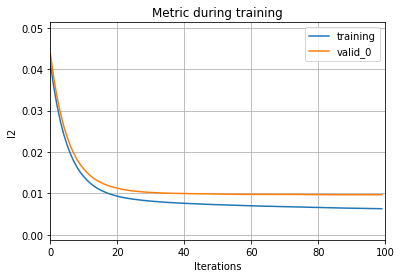

In [185]:
lgb.plot_metric(model4)

In [188]:
X = dataConv2.drop(['Boiling Point Conv.', 'Density Conv.', 'Freely Rotatable Bonds', 'H Donors'], axis =1)
y = dataConv2['Boiling Point Conv.']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
model5 = lgb.LGBMRegressor()
model5.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
y_pred = model5.predict(X_test)
y_test_exp = np.expm1(y_test)-272
y_pred_exp = np.expm1(y_pred)-272
print(mae(y_test_exp, y_pred_exp))
print(mse(y_test_exp, y_pred_exp)**0.5)

[1]	training's l2: 0.041583	valid_0's l2: 0.0439453
[2]	training's l2: 0.0360182	valid_0's l2: 0.0382677
[3]	training's l2: 0.0314452	valid_0's l2: 0.0336052
[4]	training's l2: 0.0276775	valid_0's l2: 0.0298021
[5]	training's l2: 0.024635	valid_0's l2: 0.0267423
[6]	training's l2: 0.0221334	valid_0's l2: 0.0242511
[7]	training's l2: 0.0200653	valid_0's l2: 0.0221742
[8]	training's l2: 0.0183657	valid_0's l2: 0.020467
[9]	training's l2: 0.0169531	valid_0's l2: 0.0190385
[10]	training's l2: 0.0157989	valid_0's l2: 0.0178736
[11]	training's l2: 0.0148422	valid_0's l2: 0.0169127
[12]	training's l2: 0.0140454	valid_0's l2: 0.0161319
[13]	training's l2: 0.0133775	valid_0's l2: 0.015478
[14]	training's l2: 0.0128188	valid_0's l2: 0.014959
[15]	training's l2: 0.0123491	valid_0's l2: 0.0145175
[16]	training's l2: 0.0119602	valid_0's l2: 0.0141715
[17]	training's l2: 0.0116226	valid_0's l2: 0.0138798
[18]	training's l2: 0.0113369	valid_0's l2: 0.0136089
[19]	training's l2: 0.0110989	valid_0's l2

In [193]:
data.to_csv('data.csv', encoding='utf-8')

In [194]:
q = pd.read_csv('data.csv')

In [195]:
q

,Unnamed: 0,Density,Molar Volume,Freely Rotatable Bonds,H Acceptors,H Donors,Molecular Weight,Polar Surface Area,Boiling Point
0,0,1.799,167.9,6.0,7.0,5.0,302.24,127.0,642.4
1,1,0.990,107.9,1.0,1.0,2.0,107.15,26.0,NaN
2,2,1.079,183.8,2.0,1.0,0.0,196.24,17.1,218.6
3,3,1.265,109.2,1.0,2.0,2.0,138.19,71.0,278.9
4,4,1.328,156.6,0.0,2.0,0.0,208.21,34.1,406.0
...,...,...,...,...,...,...,...,...,...
9995,9995,1.127,150.9,3.0,0.0,0.0,170.30,67.0,NaN
9996,9996,1.892,113.2,1.0,0.0,0.0,214.43,0.0,175.8
9997,9997,1.475,104.7,0.0,3.0,0.0,154.55,38.9,322.4
9998,9998,1.403,517.7,17.0,11.0,4.0,726.73,161.0,942.0
